In [14]:
#Download and Load Dataset
import torchvision.datasets as datasets

# Download CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='data/', train=True, transform=None, target_transform=None, download=True)
test_dataset = datasets.CIFAR10(root='data/', train=False, transform=None, target_transform=None, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [1]:
pip install torch torchvision


  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


Files already downloaded and verified
Files already downloaded and verified
Train dataset size: 50000
Test dataset size: 10000


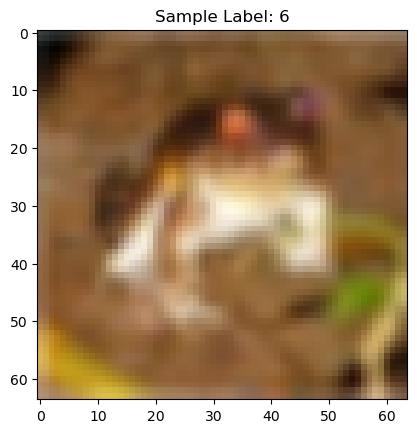

In [9]:
#Preprocess the Dataset
import torchvision.datasets as datasets
from torchvision import transforms
import matplotlib.pyplot as plt

# Preprocess and normalize
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to a fixed size
    transforms.ToTensor(),        # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

# Load CIFAR-10 train and test datasets
train_dataset = datasets.CIFAR10(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='data/', train=False, transform=transform, download=True)

# Print dataset sizes
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# Access and visualize a sample image from the train dataset
sample_image, sample_label = train_dataset[0]
sample_image = sample_image.permute(1, 2, 0)  # Change tensor shape for visualization

# Denormalize the image for visualization
sample_image = 0.5 * sample_image + 0.5

plt.imshow(sample_image)
plt.title(f"Sample Label: {sample_label}")
plt.show()


In [11]:
#Split the Dataset
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset as an example
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define X_train and y_train before using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


170498071/170498071 [==============================] - 2741s 16us/step


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Load CIFAR-10 dataset and preprocess it (resizing, normalizing, splitting)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy:", test_accuracy)


Epoch 1/3
1250/1250 [==============================] - 87s 68ms/step - loss: 1.7674 - accuracy: 0.4118 - val_loss: 1.3385 - val_accuracy: 0.5146
Epoch 2/3
1250/1250 [==============================] - 76s 61ms/step - loss: 1.2783 - accuracy: 0.5526 - val_loss: 1.1550 - val_accuracy: 0.5941
Epoch 3/3
1250/1250 [==============================] - 80s 64ms/step - loss: 1.1179 - accuracy: 0.6133 - val_loss: 1.1543 - val_accuracy: 0.5990
313/313 - 5s - loss: 1.1685 - accuracy: 0.5976 - 5s/epoch - 16ms/step
Test accuracy: 0.597599983215332
